# hpg_store_info の概要把握

## 主な特徴

- ジャンルはjapanese styleが約4割を占める一方、ほとんど出現しないジャンルもある
- 地名には県名すら不明な欠損値がある(2.5%)
- 緯度経度は店舗の住所ではなく、各地名の代表点を表す（同じ地名の緯度経度はどの店も同じ）


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [4]:
# データの読み込み
# 文字コードはUTF-8(BOMなし)
raw_hpg_store_info = pd.read_csv('../data/hpg_store_info.csv', engine='python', encoding='UTF-8')

## テーブルのサイズ、要素の確認

データセットの概要

- 4690行、5列

| column | hpg_store_id | hpg_genre_name | hpg_area_name | latitude | longitude |
| :----- | ------------ | -------------- | ------------- | -------- | --------- |
| 意味   | hpgの店ID    | ジャンル       | 地名          | 緯度     | 経度      |
| 型     | object       | object         | object        | float    | float     |
| 欠損   | なし         | なし           | なし          | なし     | なし      |

In [5]:
# 列と行
raw_hpg_store_info.shape

(4690, 5)

In [6]:
# 型を確認
raw_hpg_store_info.dtypes

hpg_store_id       object
hpg_genre_name     object
hpg_area_name      object
latitude          float64
longitude         float64
dtype: object

In [7]:
# 欠損の確認
raw_hpg_store_info.isnull().any(axis=0)

hpg_store_id      False
hpg_genre_name    False
hpg_area_name     False
latitude          False
longitude         False
dtype: bool

In [8]:
raw_hpg_store_info.head()

,hpg_store_id,hpg_genre_name,hpg_area_name,latitude,longitude
0,hpg_6622b62385aec8bf,Japanese style,Tōkyō-to Setagaya-ku Taishidō,35.643675,139.668221
1,hpg_e9e068dd49c5fa00,Japanese style,Tōkyō-to Setagaya-ku Taishidō,35.643675,139.668221
2,hpg_2976f7acb4b3a3bc,Japanese style,Tōkyō-to Setagaya-ku Taishidō,35.643675,139.668221
3,hpg_e51a522e098f024c,Japanese style,Tōkyō-to Setagaya-ku Taishidō,35.643675,139.668221
4,hpg_e3d0e1519894f275,Japanese style,Tōkyō-to Setagaya-ku Taishidō,35.643675,139.668221


In [9]:
# ランダムに行を表示
raw_hpg_store_info.sample(n=10, random_state=0)

,hpg_store_id,hpg_genre_name,hpg_area_name,latitude,longitude
291,hpg_41eb89ace6d5273f,Japanese style,Shizuoka-ken Shizuoka-shi Hinodechō,34.976196,138.395167
2112,hpg_4e19eb463f5e5c8f,International cuisine,Tōkyō-to Shibuya-ku None,35.659214,139.699736
3938,hpg_7757bca6eeaa9e7c,Seafood,Tōkyō-to Fussa-shi Musashinodai,35.748761,139.333801
3212,hpg_923981676bbf3cbc,Creation,Tōkyō-to Toshima-ku None,35.730068,139.711742
898,hpg_bb23953129d0d43b,Japanese style,Hiroshima-ken Fukuyama-shi Sannomaruchō,34.489677,133.362130
4176,hpg_0fb269423e6a4c07,Spain Bar/Italian Bar,Ōsaka-fu Ōsaka-shi Shinsaibashisuji,34.669514,135.501425
487,hpg_5276c62fa1593aab,Japanese style,Tōkyō-to Shinjuku-ku None,35.691384,139.701256
1473,hpg_3a3289a9c062f404,Japanese style,Fukuoka-ken Fukuoka-shi Ōmiya,33.579734,130.401762
3605,hpg_d3a6919845d25460,Japanese cuisine/Kaiseki,Osaka Prefecture Osaka None,34.701519,135.498859
1280,hpg_5b25b871b61346ad,Japanese style,Fukuoka-ken Kurume-shi Higashimachi,33.311645,130.518556


In [10]:
# object型の概要
raw_hpg_store_info.describe(include='O')

,hpg_store_id,hpg_genre_name,hpg_area_name
count,4690,4690,4690
unique,4690,34,119
top,hpg_070fec64f8bf53d6,Japanese style,Tōkyō-to Shinjuku-ku None
freq,1,1750,257


In [11]:
# 数値型の概要
raw_hpg_store_info.describe()

,latitude,longitude
count,4690.000000,4690.000000
mean,35.810261,137.675816
std,2.138755,3.197233
min,33.311645,130.339313
25%,34.692109,135.498859
50%,35.659214,139.495733
75%,35.703381,139.737998
max,43.774846,143.714585


## hpg_store_id (hpgの店ID)


### 特徴
  - 重複IDなし


In [12]:
raw_hpg_store_info['hpg_store_id'].duplicated().any(axis=0)

False

## hpg_genre_name (hpgでの店のジャンル)

### 特徴

- ジャンルは３４種類
- Japanese Style が最も多く、全体の37%。ほとんど出現しないジャンルも複数ある。
- 分類の粒度が不明（日本料理にもいくつかジャンルがある）

In [13]:
# ジャンル数を確認
raw_hpg_store_info['hpg_genre_name'].unique().size

34

In [14]:
hpg_genre_name_dist = raw_hpg_store_info['hpg_genre_name'].value_counts()

In [15]:
# 出現回数を表示
print('head_5')
print(hpg_genre_name_dist.head())
print()
print('tail_5')
print(hpg_genre_name_dist.tail())

head_5
Japanese style           1750
International cuisine     700
Creation                  410
Seafood                   339
Grilled meat              325
Name: hpg_genre_name, dtype: int64

tail_5
Dim Sum/Dumplings              2
Spain/Mediterranean cuisine    1
Udon/Soba                      1
Shanghai food                  1
Taiwanese/Hong Kong cuisine    1
Name: hpg_genre_name, dtype: int64


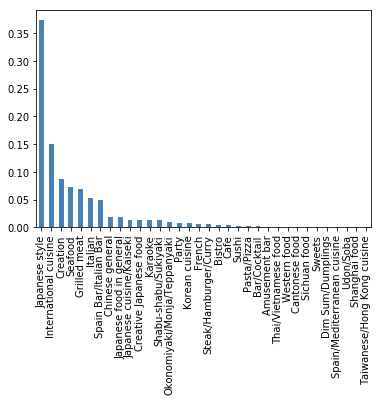

In [16]:
# 比率をプロット
(hpg_genre_name_dist/len(raw_hpg_store_info)).plot.bar(color='steelblue')

## hpg_area_name (hpgでの店の地名)

### 特徴

- データ内の地名の数は119箇所
- None None None という地名がある。
- 13県のデータ。東京が4割以上、他の県は1割以下

In [17]:
# 地名の数を確認
raw_hpg_store_info['hpg_area_name'].unique().size

119

In [18]:
hpg_area_name_dist = raw_hpg_store_info['hpg_area_name'].value_counts()

In [19]:
# 出現回数を表示
print('head_5')
print(hpg_area_name_dist.head())
print()
print('tail_5')
print(hpg_area_name_dist.tail())

head_5
Tōkyō-to Shinjuku-ku None              257
Tōkyō-to Chūō-ku Ginza                 198
Hyōgo-ken Kōbe-shi None                163
Ōsaka-fu Ōsaka-shi Shinsaibashisuji    150
Osaka Prefecture Osaka None            145
Name: hpg_area_name, dtype: int64

tail_5
Fukuoka-ken Iizuka-shi Mashiki     2
Niigata-ken Nagaoka-shi Rokusho    1
Tōkyō-to Shinagawa-ku Koyama       1
Hokkaidō Ashibetsu-shi None        1
Ōsaka-fu Minoo-shi Hanjo           1
Name: hpg_area_name, dtype: int64


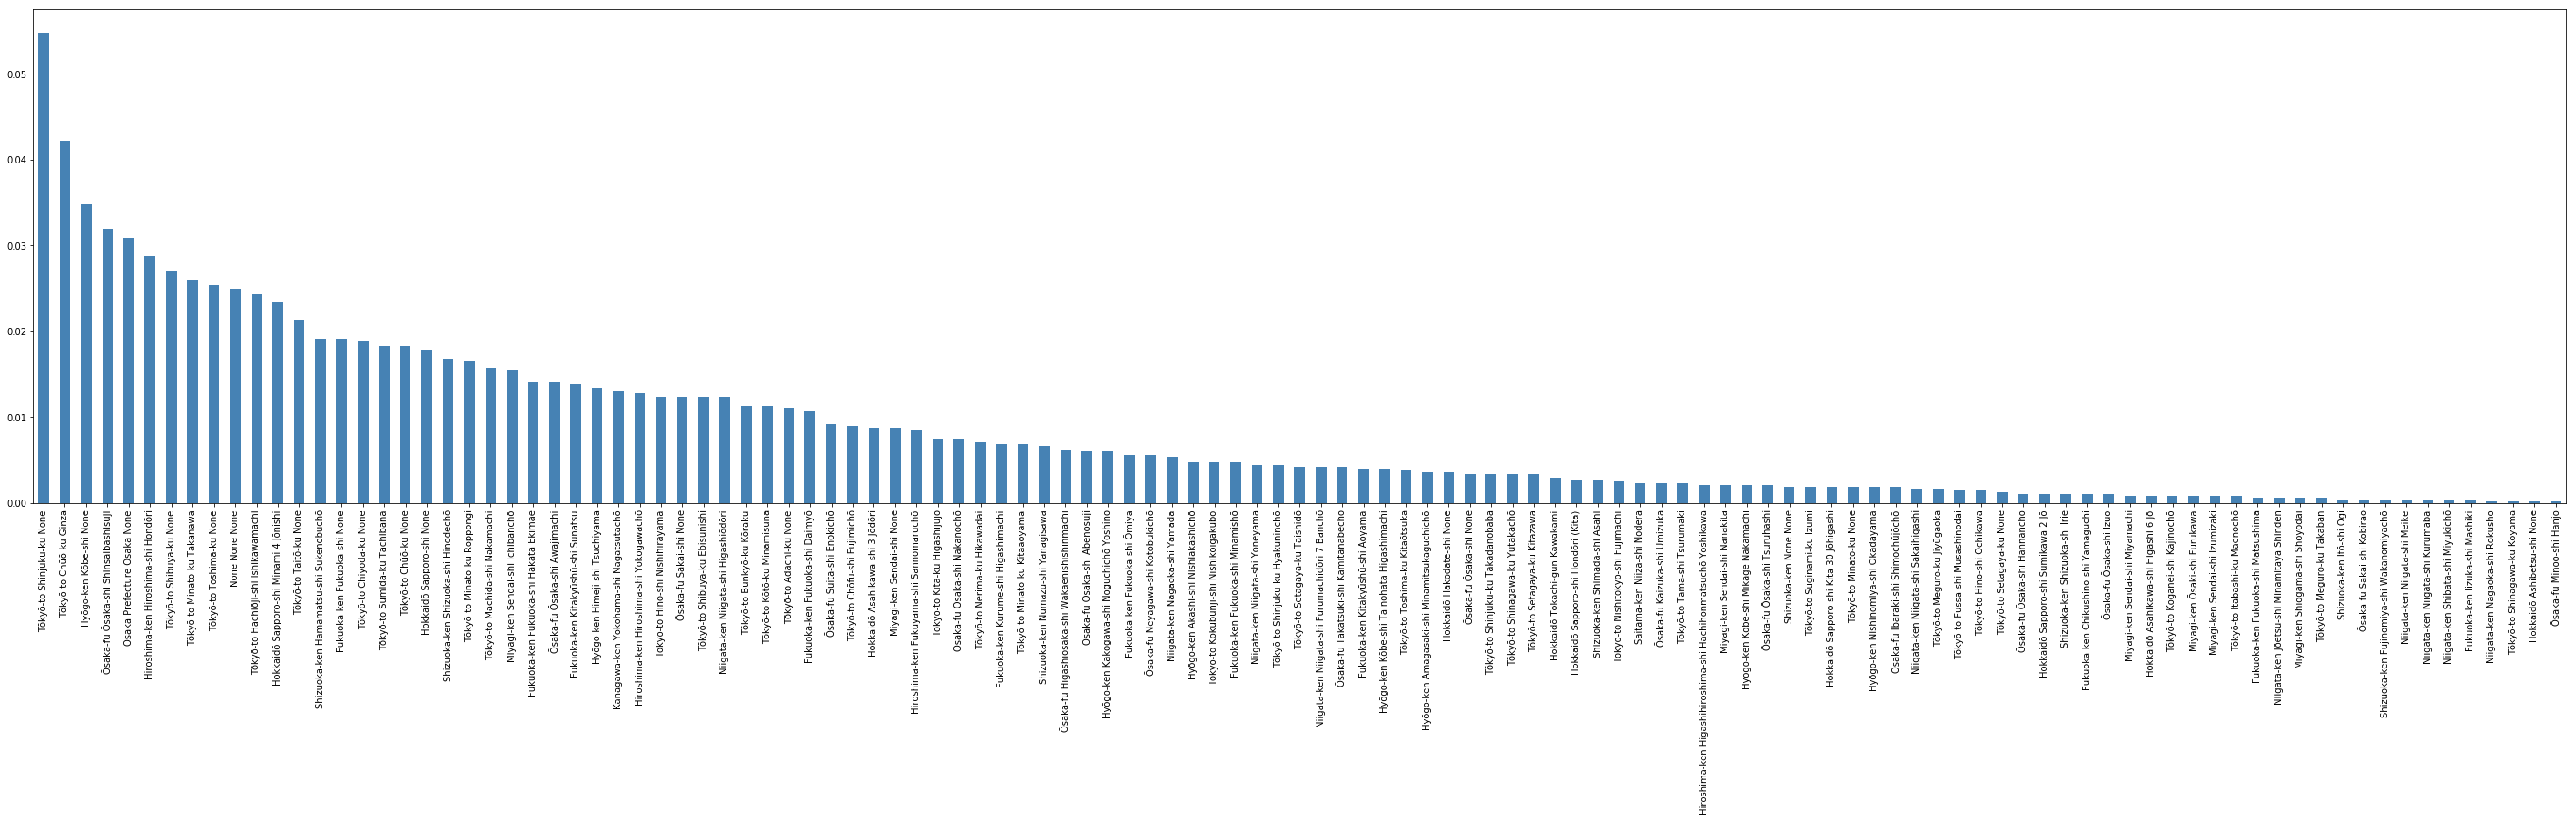

In [20]:
# 比率をプロット
(hpg_area_name_dist/len(raw_hpg_store_info)).plot.bar(color='steelblue',figsize=(50,10))


### 欠損を表す地名がある(117件)

In [21]:
raw_hpg_store_info.query('hpg_area_name == "None None None"').head()

,hpg_store_id,hpg_genre_name,hpg_area_name,latitude,longitude
651,hpg_5fea90674a2185a0,Japanese style,None None None,35.703381,139.660343
652,hpg_03d5b644f759a72a,Japanese style,None None None,35.703381,139.660343
653,hpg_0bf592f4c532d843,Japanese style,None None None,35.703381,139.660343
654,hpg_a11c66d3ce9a8c13,Japanese style,None None None,35.703381,139.660343
655,hpg_5cb7bac2842ca8f5,Japanese style,None None None,35.703381,139.660343


### 県名レベルでの集計

In [22]:
hpg_pref_name = raw_hpg_store_info['hpg_area_name'].apply(lambda x:x.split(' ')[0])

In [23]:
# 県の数
hpg_pref_name.unique().size

13

In [24]:
hpg_pref_name_dist = hpg_pref_name.value_counts()

In [25]:
# 出現回数を表示
print('head_5')
print(hpg_pref_name_dist.head())
print()
print('tail_5')
print(hpg_pref_name_dist.tail())

head_5
Tōkyō-to       2076
Ōsaka-fu        514
Fukuoka-ken     380
Hyōgo-ken       331
Hokkaidō        298
Name: hpg_area_name, dtype: int64

tail_5
Niigata-ken     142
Miyagi-ken      139
None            117
Kanagawa-ken     61
Saitama-ken      11
Name: hpg_area_name, dtype: int64


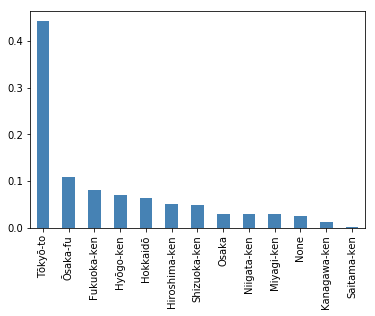

In [26]:
# 比率をプロット
(hpg_pref_name_dist/len(raw_hpg_store_info)).plot.bar(color='steelblue')


## latitude, longitude 

### 特徴

- 北海道から福岡まで全国の主要都市からのデータ

In [27]:
# 再掲
# 数値型の概要
raw_hpg_store_info.describe()

,latitude,longitude
count,4690.000000,4690.000000
mean,35.810261,137.675816
std,2.138755,3.197233
min,33.311645,130.339313
25%,34.692109,135.498859
50%,35.659214,139.495733
75%,35.703381,139.737998
max,43.774846,143.714585


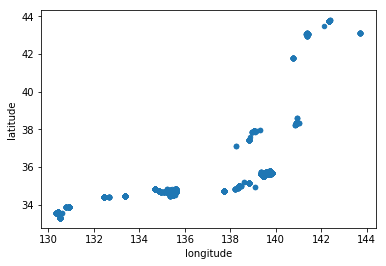

In [28]:
raw_hpg_store_info.plot.scatter(x='longitude', y='latitude')

### 東西南北の最端地点

In [29]:
# 最北
raw_hpg_store_info.sort_values(by='longitude').tail(1)

,hpg_store_id,hpg_genre_name,hpg_area_name,latitude,longitude
2430,hpg_55629e3b63f4ae74,International cuisine,Hokkaidō Tokachi-gun Kawakami,43.129879,143.714585


In [30]:
# 最南
raw_hpg_store_info.sort_values(by='longitude').head(1)

,hpg_store_id,hpg_genre_name,hpg_area_name,latitude,longitude
3040,hpg_5fc79c99232bc6eb,Creation,Fukuoka-ken Fukuoka-shi Minamishō,33.576379,130.339313


In [31]:
# 最東端
raw_hpg_store_info.sort_values(by='latitude').tail(1)

,hpg_store_id,hpg_genre_name,hpg_area_name,latitude,longitude
1642,hpg_357ae60e6bee336b,Japanese style,Hokkaidō Asahikawa-shi Higashi 6 Jō,43.774846,142.377403


In [32]:
# 最西
raw_hpg_store_info.sort_values(by='latitude').head(1)

,hpg_store_id,hpg_genre_name,hpg_area_name,latitude,longitude
2934,hpg_0640338d8f68c004,Grilled meat,Fukuoka-ken Kurume-shi Higashimachi,33.311645,130.518556


### ジャンルと地名の相関

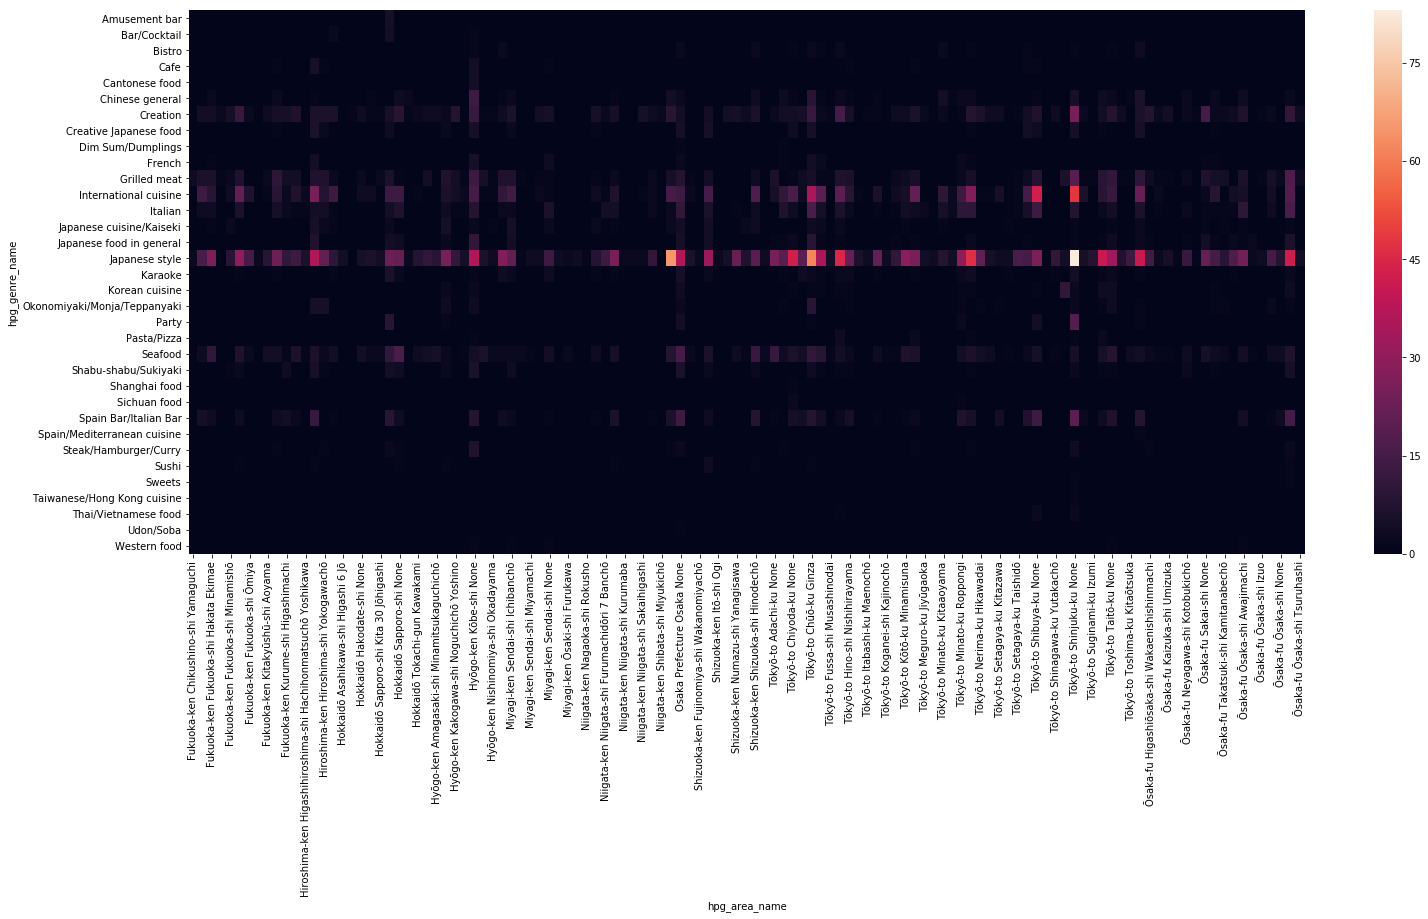

In [43]:
# ジャンルと地名でピボットテーブル作成
hpg_genre_area_pivot = raw_hpg_store_info.pivot_table(values='hpg_store_id', index='hpg_genre_name', columns='hpg_area_name', aggfunc=lambda x: x.value_counts().count())
# NaNに0を代入
hpg_genre_area_pivot[hpg_genre_area_pivot.isnull()] = 0
# ヒートマップを出力
plt.subplots(figsize=(25,10))
sns.heatmap(hpg_genre_area_pivot)

#### 県ごとに見てみる

In [63]:
raw_hpg_store_info_pref = pd.concat([raw_hpg_store_info, hpg_pref_name], axis=1)

In [64]:
raw_hpg_store_info_pref.columns = ['hpg_store_id', 'hpg_genre_name', 'hpg_area_name', 'latitude',
       'longitude', 'hpg_fref_name']

In [65]:
raw_hpg_store_info_pref.head()

,hpg_store_id,hpg_genre_name,hpg_area_name,latitude,longitude,hpg_fref_name
0,hpg_6622b62385aec8bf,Japanese style,Tōkyō-to Setagaya-ku Taishidō,35.643675,139.668221,Tōkyō-to
1,hpg_e9e068dd49c5fa00,Japanese style,Tōkyō-to Setagaya-ku Taishidō,35.643675,139.668221,Tōkyō-to
2,hpg_2976f7acb4b3a3bc,Japanese style,Tōkyō-to Setagaya-ku Taishidō,35.643675,139.668221,Tōkyō-to
3,hpg_e51a522e098f024c,Japanese style,Tōkyō-to Setagaya-ku Taishidō,35.643675,139.668221,Tōkyō-to
4,hpg_e3d0e1519894f275,Japanese style,Tōkyō-to Setagaya-ku Taishidō,35.643675,139.668221,Tōkyō-to


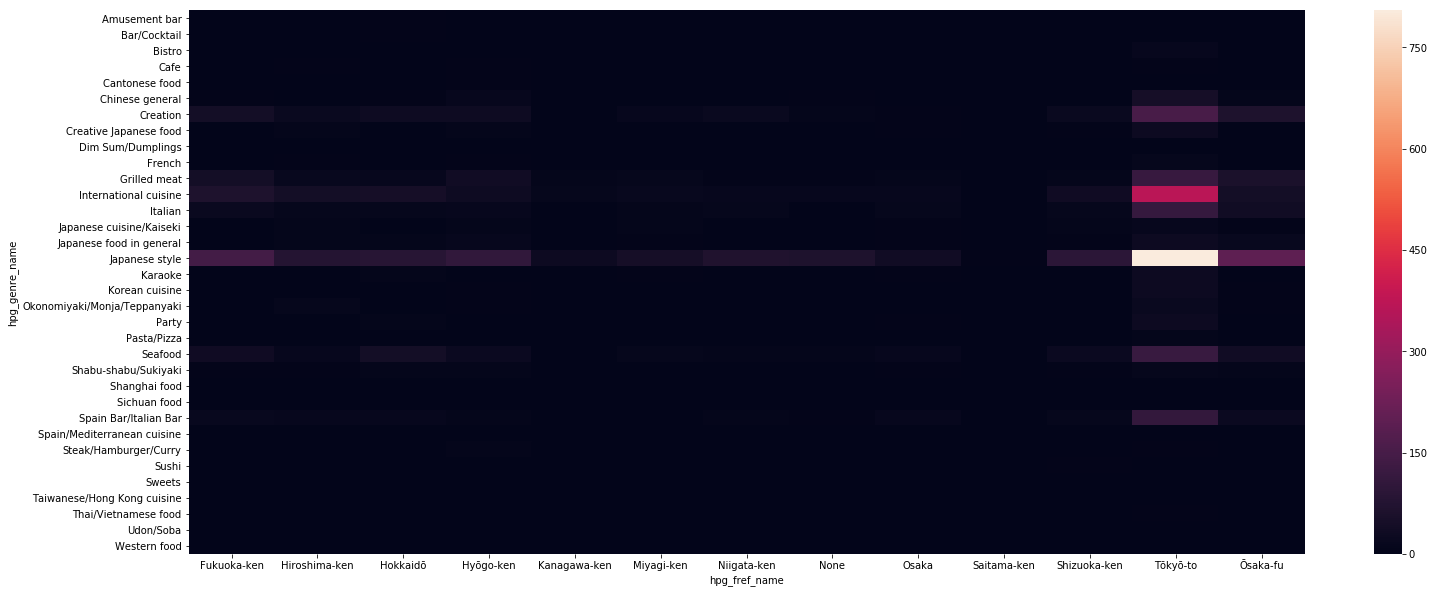

In [66]:
# ジャンルと地名でピボットテーブル作成
hpg_genre_area_pivot = raw_hpg_store_info_pref.pivot_table(values='hpg_store_id', index='hpg_genre_name', columns='hpg_fref_name', aggfunc=lambda x: x.value_counts().count())
# NaNに0を代入
hpg_genre_area_pivot[hpg_genre_area_pivot.isnull()] = 0
# ヒートマップを出力
plt.subplots(figsize=(25,10))
sns.heatmap(hpg_genre_area_pivot)

## 緯度経度は地域名で一意に決まるの（同じ地名だと緯度経度はすべて同じ）

In [46]:
raw_hpg_store_info.query('hpg_area_name == "Tōkyō-to Setagaya-ku Taishidō"').describe()

,latitude,longitude
count,2.000000e+01,2.000000e+01
mean,3.564367e+01,1.396682e+02
std,7.290015e-15,2.916006e-14
min,3.564367e+01,1.396682e+02
25%,3.564367e+01,1.396682e+02
50%,3.564367e+01,1.396682e+02
75%,3.564367e+01,1.396682e+02
max,3.564367e+01,1.396682e+02


#### 検証方法
1. area_name で group by 
2. それぞれのグループでlatitudeの分散を計算する
3. 分散が０ならグループのなかで値はすべて同じ

In [49]:
raw_hpg_store_info.groupby('hpg_area_name')['latitude'].var()

hpg_area_name
Fukuoka-ken Chikushino-shi Yamaguchi                             0.000000
Fukuoka-ken Fukuoka-shi Daimyō                                   0.000000
Fukuoka-ken Fukuoka-shi Hakata Ekimae                            0.000000
Fukuoka-ken Fukuoka-shi Matsushima                               0.000000
Fukuoka-ken Fukuoka-shi Minamishō                                0.000000
Fukuoka-ken Fukuoka-shi None                                     0.000196
Fukuoka-ken Fukuoka-shi Ōmiya                                    0.000000
Fukuoka-ken Iizuka-shi Mashiki                                   0.000000
Fukuoka-ken Kitakyūshū-shi Aoyama                                0.000000
Fukuoka-ken Kitakyūshū-shi Sunatsu                               0.000000
Fukuoka-ken Kurume-shi Higashimachi                              0.000000
Hiroshima-ken Fukuyama-shi Sannomaruchō                          0.000000
Hiroshima-ken Higashihiroshima-shi Hachihonmatsuchō Yoshikawa    0.000000
Hiroshima-ken Hiroshima-